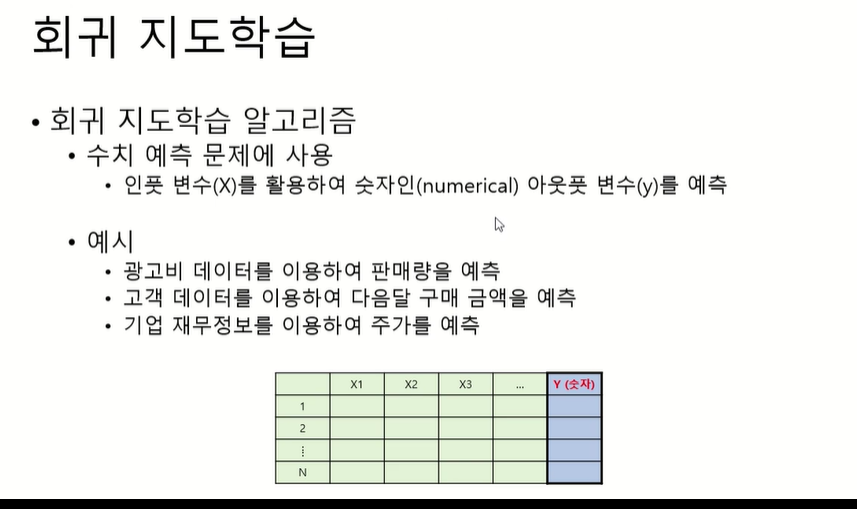

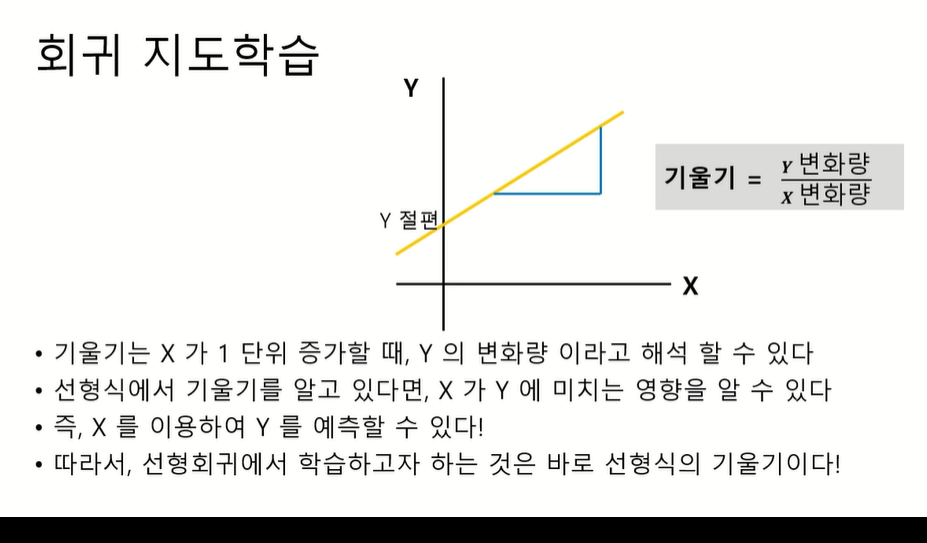

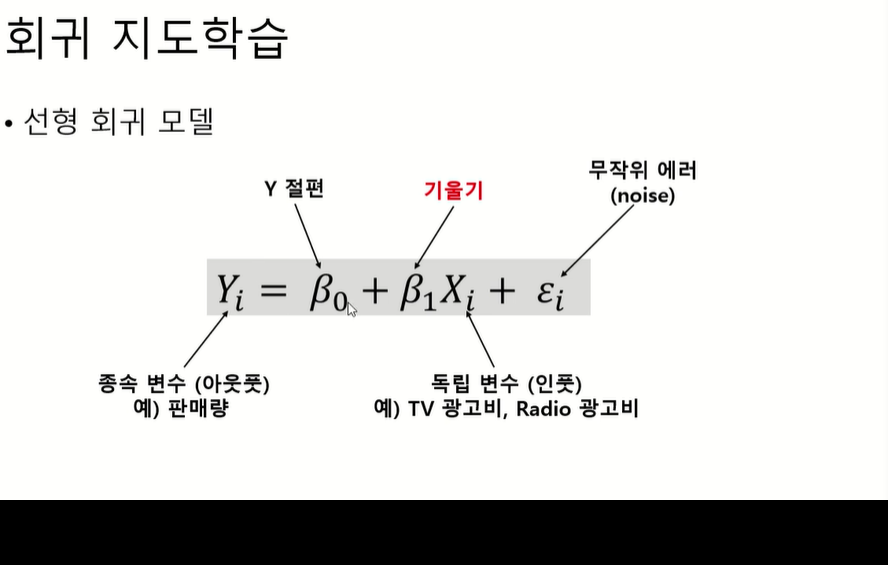

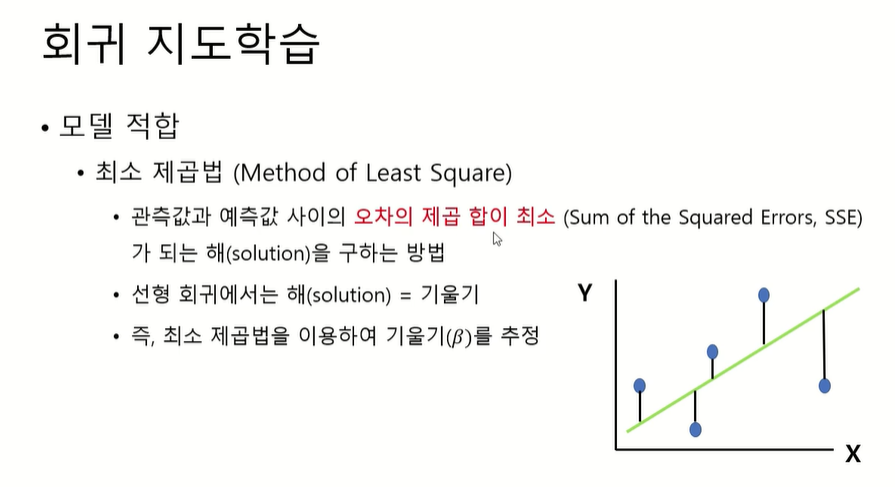

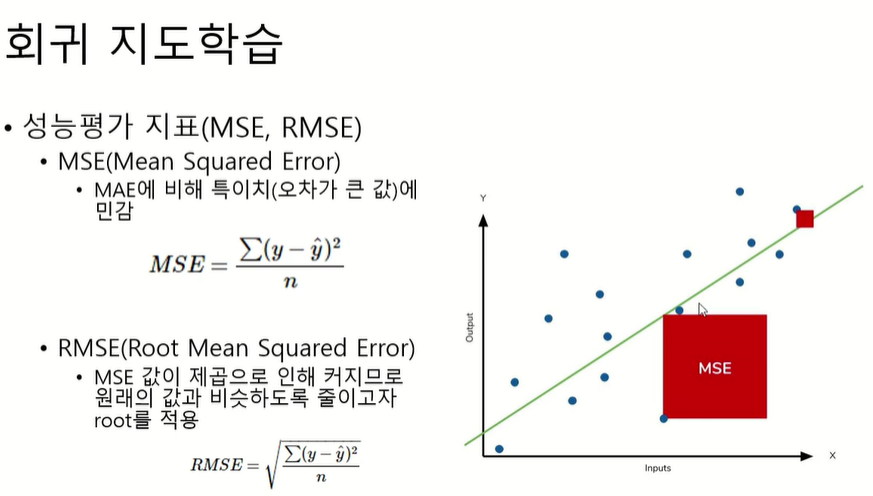

- 평균으로 구한 잔차들의 합보다 최소 제곱법으로 구한 합이 더 적다

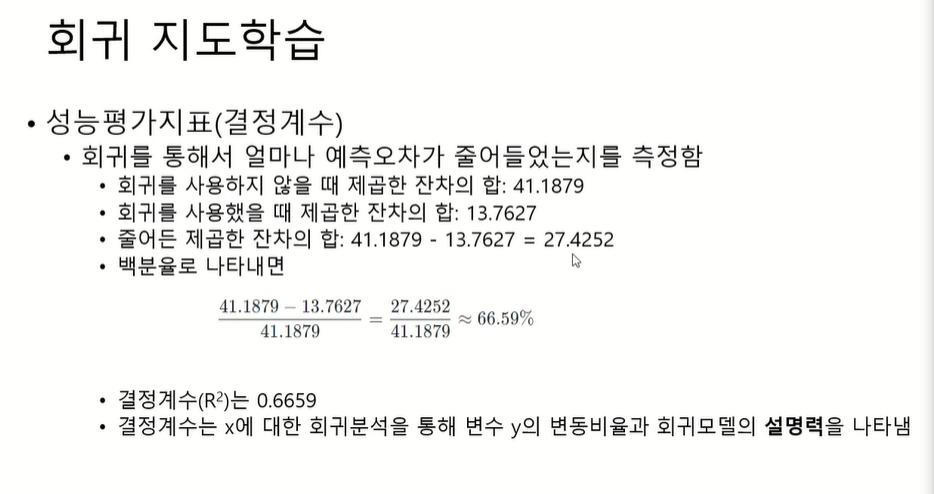

# Linear Regression 실습
- 아버지의 키와 아들의 키에 대한 회귀모형
- X 변수가 하나인 Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('./data/heights.csv')

In [3]:
data

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


In [4]:
data.shape

(1078, 2)

In [5]:
#결측치 확인
data.isnull().sum()

father    0
son       0
dtype: int64

## 산점도로 전체 데이터 분포 파악

Text(0, 0.5, 'son')

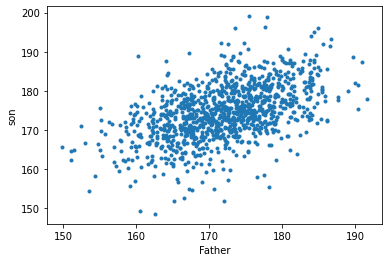

In [6]:
import matplotlib.pyplot as plt

X = data['father']
y = data['son']

plt.plot(X,y,'.')
plt.xlabel('Father')
plt.ylabel('son')

##  훈련데이터와 테스트데이터 분리하기

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [9]:
X_train.values

array([179.7426428, 183.7417966, 178.0826004, 182.3291756, 174.3446094,
       173.4406488, 166.3236704, 164.62629  , 169.9563022, 178.418109 ,
       167.2014182, 157.8077108, 178.9448288, 174.9714814, 164.0612924,
       165.940359 , 178.3983986, 175.378364 , 178.44516  , 170.5853332,
       182.0390822, 175.5302052, 185.6017878, 158.537021 , 172.7851256,
       174.0608406, 183.363743 , 164.8211842, 172.7918566, 177.5522992,
       165.3217674, 173.4291172, 175.7518456, 178.753008 , 175.0170236,
       175.9204   , 165.8349236, 175.4575866, 173.5024216, 149.88032  ,
       160.1153262, 176.8058948, 171.7215514, 172.1284848, 173.5399374,
       167.7199592, 177.197512 , 164.661088 , 185.1655682, 173.3088228,
       173.1887062, 163.447603 , 172.957236 , 185.5307186, 162.3644962,
       159.870775 , 172.2060056, 179.6754598, 167.29456  , 176.7021866,
       178.4364224, 162.395535 , 177.9632966, 160.5092802, 184.795795 ,
       176.8015768, 170.9806842, 170.9701432, 171.810045 , 172.0

Text(0, 0.5, 'y train')

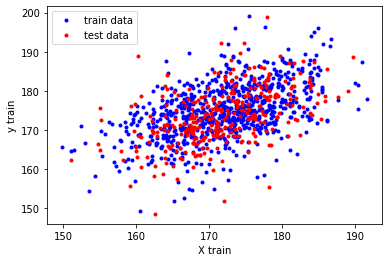

In [10]:
#훈련데이터(파란색)와 테스트데이터(붉은색) 확인하기
plt.plot(X_train, y_train, 'b.', label = 'train data')
plt.plot(X_test, y_test, 'r.', label = 'test data')
plt.legend()
plt.xlabel('X train')
plt.ylabel('y train')

### 모델 적합

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train.values.reshape(-1,1), y_train) # reshape(-1,1)으로 칼럼 갯수가 1개인 행렬로 조정

LinearRegression()

In [12]:
#회귀계수(기울기와 절편)
[lr.coef_, lr.intercept_]

[array([0.50355769]), 88.1402903918293]

In [13]:
#y = b+ax
f = lambda x:lr.intercept_+(lr.coef_*x)

### 시각화

In [14]:
# train 데이터의 x값 범위
x = np.array([min(X_train),max(X_train)])
x

array([149.88032  , 191.6021822])

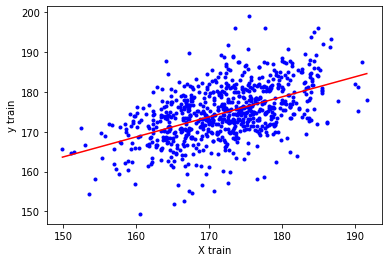

In [15]:
plt.plot(X_train, y_train,'b.') # train 데이터의 분포
plt.xlabel('X train')
plt.ylabel('y train')
plt.plot(x, f(x), 'r') #회귀식 그래프

In [16]:
# test 데이터의 x값 범위(최대값, 최소값)
x = np.array([min(X_test),max(X_test)])
x

array([151.0891314, 189.7185944])

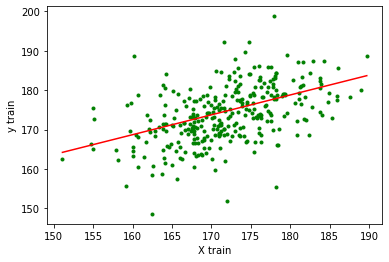

In [17]:
plt.plot(X_test, y_test,'g.') # train 데이터의 분포
plt.xlabel('X train')
plt.ylabel('y train')
plt.plot(x, f(x), 'r') #회귀식 그래프

### 회귀모형을 통한 예측

In [18]:
y_pred = lr.predict(X_test.values.reshape(-1,1))
y_pred

array([169.85014541, 178.47356322, 172.69337968, 172.59824494,
       179.09004604, 173.49896805, 177.28700103, 170.80900073,
       175.26274664, 180.70922956, 177.53941889, 173.29071532,
       173.99343078, 172.22196518, 180.6644377 , 174.62035054,
       177.74946227, 178.60240057, 173.9003425 , 168.71163661,
       177.90246062, 174.26704228, 173.82157943, 170.66504517,
       173.44440435, 166.05313359, 176.17345903, 175.34865953,
       172.55717508, 171.96741133, 180.84082963, 173.4415521 ,
       174.23610239, 174.26660741, 176.40346817, 175.69032856,
       180.01458481, 171.60083946, 181.74686074, 174.53379814,
       175.80051756, 176.20034438, 174.34913084, 168.57280999,
       172.62505354, 169.99183707, 172.54088015, 175.69264361,
       180.22814554, 168.92714148, 176.92017335, 172.66258048,
       176.83360816, 175.60363546, 174.30597615, 169.04055365,
       170.45385065, 172.87461915, 172.80530816, 172.6334824 ,
       174.91312201, 170.8792582 , 169.7719579 , 175.69

In [19]:
#f 함수를 이용,ex) 아버지의 키가 180이라면
f(180)

array([178.7806749])

In [20]:
lr.predict([[180]])

array([178.7806749])

### 성능평가

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse **0.5

In [23]:
r2 = r2_score(y_test, y_pred)

In [24]:
print('MAE : %.2f'%mae)
print('MSE : %.2f'%mse)
print('RMSE : %.2f'%rmse)
print('R2 : %.2f'%r2)

MAE : 4.91
MSE : 40.31
RMSE : 6.35
R2 : 0.23


- r스퀘어는 x변수가 많아지면 많아질수록 커지는 경향 존재
- 아버지의 키와 어머니의 키를 함께 예측하면 더 잘 예측할 수 있다.

# 단톡 과제 - Linear Regression(manhattan)
- 경영정보학과 60171100 윤민혁
- 집값에 대한 회귀모형
- X변수가 여러개인 Mulitple Linear Regression

In [25]:
df = pd.read_csv('./data/manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [26]:
# x데이터와 y데이터 분리하기
X = df.drop(['borough','neighborhood','rental_id','rent'], axis = 1)
y = df[['rent']]

In [27]:
# train데이터와 test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

### 모델적합

In [28]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

### 회귀모형을 통한 예측

In [29]:
X.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [30]:
my_apt = [[1,1,600,16,1,8,1,0,1,0,0,1,1,0]]
mlr.predict(my_apt)

C:\Users\alsgu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2843.21472973]])

In [31]:
y_pred = mlr.predict(X_test)

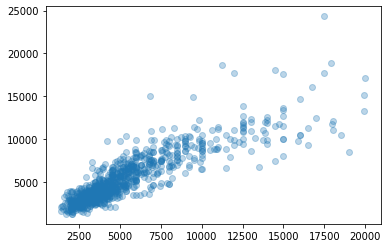

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha = 0.3)
plt.show()

### 회귀계수

In [33]:
X.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [34]:
# X변수들에 대한 기울기
print(mlr.coef_)

[[-3.37442440e+02  1.14772852e+03  5.02185987e+00 -1.30836256e+01
   2.39856476e+01 -7.13826956e+00 -9.63291469e+01  6.83771666e-01
   8.75351951e+01 -8.53967304e+01  1.38431646e+02 -9.02201864e-01
  -2.17216255e+02 -1.65474531e+01]]


In [35]:
# y절편
print(mlr.intercept_)

[-510.81634984]


### 변수별 상관 확인

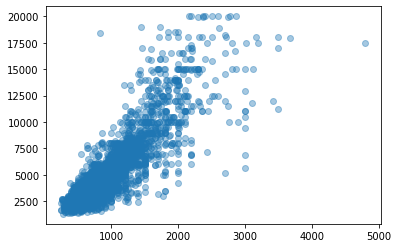

In [36]:
# 넓이와 집값 간 상관관계
plt.scatter(df[['size_sqft']],df[['rent']], alpha=0.4)
plt.show()

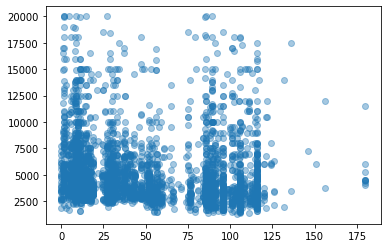

In [37]:
# 연식과 짒간 간 상관관계
plt.scatter(df[['building_age_yrs']],df[['rent']], alpha=0.4)
plt.show()

### 성능평가

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [40]:
print('MAE : %.2f'%mae)
print('MSE : %.2f'%mse)
print('RMSE : %.2f'%rmse)
print('R2 : %.2f'%r2)

MAE : 951.32
MSE : 2271426.68
RMSE : 1507.13
R2 : 0.77


- 예측값과 실제 값이 951달러 정도 차이
- 0.77 정도의 설명력이 존재(r2), 변수가 많기 때문에

## 상관관계가 높은 변수 5개만 이용하여 모델 제작

In [41]:
df = df.drop(['borough','neighborhood','rental_id'], axis = 1)

In [42]:
df.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rent,1.000000,0.638336,0.769474,0.857954,0.035164,0.215867,-0.128895,-0.101497,0.035165,0.053873,0.031302,0.051860,0.052241,0.029302,0.040609
bedrooms,0.638336,1.000000,0.720885,0.771263,0.076543,0.043539,0.037228,-0.100352,0.002938,0.008721,-0.017331,-0.006771,0.005467,0.003037,-0.004112
bathrooms,0.769474,0.720885,1.000000,0.803627,0.086932,0.127969,-0.095421,-0.062205,0.019556,0.025752,0.014745,0.021150,0.038829,0.042304,0.029739
size_sqft,0.857954,0.771263,0.803627,1.000000,0.039448,0.107186,0.014489,-0.141451,0.024822,0.038263,0.026098,0.040916,0.050364,0.021921,0.029347
min_to_subway,0.035164,0.076543,0.086932,0.039448,1.000000,0.082445,-0.184682,0.080088,-0.020693,-0.001327,-0.009012,-0.000410,-0.012244,0.001500,-0.004315
floor,0.215867,0.043539,0.127969,0.107186,0.082445,1.000000,-0.389260,0.104317,0.056322,0.038870,0.095963,0.068917,0.002337,0.059423,0.065410
building_age_yrs,-0.128895,0.037228,-0.095421,0.014489,-0.184682,-0.389260,1.000000,-0.221429,-0.041305,-0.030014,-0.047265,-0.060627,-0.027420,-0.050321,-0.063110
no_fee,-0.101497,-0.100352,-0.062205,-0.141451,0.080088,0.104317,-0.221429,1.000000,-0.095718,-0.070324,-0.182547,-0.161519,-0.078660,-0.049684,-0.101230
has_roofdeck,0.035165,0.002938,0.019556,0.024822,-0.020693,0.056322,-0.041305,-0.095718,1.000000,0.313459,0.489836,0.516534,0.331999,0.122568,0.561626
has_washer_dryer,0.053873,0.008721,0.025752,0.038263,-0.001327,0.038870,-0.030014,-0.070324,0.313459,1.000000,0.328291,0.379999,0.455166,0.140979,0.348433


- 상관관계가 높은 size_sqft, bathroom, bedroom, floor, building_age_yrs를 이용하여 모델 제작

In [43]:
X2 = df.drop(['rent','min_to_subway','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym'], axis= 1)
y2 = df[['rent']]

In [44]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.3, random_state = 0)

In [45]:
X2_test

,bedrooms,bathrooms,size_sqft,floor,building_age_yrs
2606,1.0,1,795,8.0,104
2010,2.0,2,1085,10.0,1
2804,1.0,1,693,6.0,8
1632,1.0,1,950,16.0,86
2372,1.0,1,727,19.0,32
...,...,...,...,...,...
3343,1.0,1,603,10.0,15
1652,0.0,1,530,22.0,16
206,0.0,1,450,10.0,93
1180,3.0,3,1726,9.0,8


In [46]:
y_test

,rent
2606,3700
2010,5714
2804,4375
1632,4600
2372,3250
...,...
3343,3225
1652,3395
206,2450
1180,13250


In [47]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X2_train, y2_train)

LinearRegression()

In [48]:
y_pred2 = mlr.predict(X2_test)

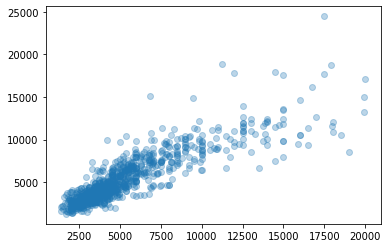

In [49]:
import matplotlib.pyplot as plt
plt.scatter(y2_test, y_pred2, alpha = 0.3)
plt.show()

## 성능평가

In [50]:
mae_1 = mean_absolute_error(y_test, y_pred)
mse_1 = mean_squared_error(y_test, y_pred)
rmse_1 = mse_1 ** 0.5
r2_1 = r2_score(y_test, y_pred)

In [51]:
mae_2 = mean_absolute_error(y2_test, y_pred2)
mse_2 = mean_squared_error(y2_test, y_pred2)
rmse_2 = mse_2 ** 0.5
r2_2 = r2_score(y2_test, y_pred2)

In [52]:
print('기존모형')
print('MAE : %.2f'%mae_1)
print('MSE : %.2f'%mse_1)
print('RMSE : %.2f'%rmse_1)
print('R2 : %.2f'%r2_1)
print('-------------------------------------------')
print('X변수 5개 모형')
print('MAE : %.2f'%mae_2)
print('MSE : %.2f'%mse_2)
print('RMSE : %.2f'%rmse_2)
print('R2 : %.2f'%r2_2)

기존모형
MAE : 951.32
MSE : 2271426.68
RMSE : 1507.13
R2 : 0.77
-------------------------------------------
X변수 5개 모형
MAE : 951.56
MSE : 2288284.98
RMSE : 1512.71
R2 : 0.77


- R2의 값은 같지만 MAE,MSE,RMSE의 값은 5개의 변수만 사용한 모델이 더 크기때문에 기존의 모델이 더 좋다.